<!--![Poster TSDN 2022](https://i.ibb.co/vcFzWbQ/tsdn.png)-->

<h1 style="text-align: center;">
    Pencegahan Gagal Panen dengan Klasifikasi Citra Digital untuk Mendeteksi Penyakit Padi
</h1>
<br>

<div style="text-align:center">
<img src="https://i.ibb.co/W0TqCTz/Banner-Tim-ORBIT.png" alt="logo Orbit, SMKN 4 Bandung, dan Anggota Tim"/>
</div>

<br>

<h4 style="text-align: center;">
    Dibuat oleh tim Orbit dari SMK Negeri 4 Bandung untuk memenuhi kriteria penilaian dalam capaian Computer Vision di ajang Turnamen Sains Data Nasional 2022 kategori pelajar dengan use-case Budaya Digital (B.2 Penglihatan Komputer).
</h4>


### Catatan:
Kami **sangat** merekomendasikan tim panelis untuk melihat atau menjalankan notebook ini pada tautan berikut [Kaggle](https://www.kaggle.com/code/rafkaip/orbit-cv/notebook) (Jupyter Notebook environment yang berjalan di kernel kaggle) agar proses eksekusi kode berjalan lebih cepat, tidak memakan resource disk local komputer, dan tidak ada error yang berkaitan dengan ketiadaan data.

# Daftar isi
Ketuk untuk berpindah ke bagian yang diinginkan.
#### [**0. Alur metode pembuatan model machine learning**](#alur)
#### [**1. Deskripsi proyek**](#deskripsi) 
#### [**2. Impor pustaka**](#import)
#### [**3. Pemahaman data**](#pemahaman-data)
#### [**4. Pemrosesan data**](#pemrosesan)
#### [**5. Pendefinisian algoritma/model**](#pendefinisian)
#### [**6. Proses pelatihan model**](#pelatihan)
#### [**7. Pengujian interaktif model machine learning**](#pengujian)
#### [**8. Tahap produksi (web deploy)**](#deploy)
#### [**9. Daftar pustaka**](#pustaka)

<a id="alur"></a> 
# 0. Alur metode pembuatan model machine learning
![alur metode](https://i.ibb.co/DrKtmgy/Orbit-PH-13-page-0001.jpg)
<br>*Gambar dari file presentasi tim Orbit

<a id="deskripsi"></a> 
# 1. Deskripsi proyek
Berisi informasi yang akan membantu tim panelis memahami konteks permasalahan yang kami selesaikan dengan pendekatan machine learning.

### 1.1. Latar belakang
Tim Orbit berupaya membuat inovasi yang dapat dikembangkan bagi pertanian di Indonesia. Dari analisa dashboard yang sudah kami buat sebelumnya ([Link Tableau](https://public.tableau.com/app/profile/raka.iskandar/viz/VisualisasiDataTSDN2022/Storyboard)) Kami merangkum insight sebagai berikut:

* Menurut Food and Agriculture Organization, Indonesia menyumbang 6,74% produksi padi dunia pada tahun 2020.
* Produksi padi di Indonesia termasuk tinggi dibanding negara lain, sejak tahun 1961 hingga 2020, hasil produksi padi di Indonesia selalu diatas 1 juta ton. Hanya saja produksi padi Indonesia seiring tahun tidak dibarengi perkembangan yang signifikan, bahkan Bangladesh dan Vietnam sudah siap menyalip kapanpun mereka mau.
* Salah satu cara mengoptimalisasi produksi adalah menjaga padi dalam keadaan sehat dan tidak diserang penyakit karena padi mudah terserang penyakit hingga menyebabkan gagal panen sampai dapat kehilangan 70% produksi.
* Pengawasan harus dilakukan dan diberi pencegahan agar produksi tetap maksimal meskipun monitoring kualitas padi memakan waktu jika dilakukan secara manual.

<br> Salah satu cara meningkatkan produksi padi tanpa menambah lahan baru adalah memastikan padi yang ditanam tidak mengidap penyakit, agar hasil panen padi bisa optimal dan meningkatkan produksi. 

<br>Kami akan menindaklanjuti temuan dari analisis dashboard dengan membuat model computer vision untuk mendeteksi penyakit padi.



### 1.2. Informasi data
Berisi lebih dari 10.000 data gambar padi yang terbagi dalam 10 label kategori penyakit dengan total ukuran data sekitar 1,3GB yang mana sumber data ini bersumber dari tim peneliti dari Department of Computer Science and Engineering, Manonmaniam Sundaranar University, Tirunelveli, India.

### 1.3. Tujuan akhir
* Model machine learning yang berfungsi dengan baik dan akurat dalam mendeteksi penyakit padi.
* Model machine learning memiliki setidaknya tingkat akurasi 96% pada data validasi.
* Model machine learning dapat diekspor dengan ukuran sekecil mungkin untuk diimpelentasikan kedalam web apps.

### 1.4. Rancangan implementasi bisnis (tahap produksi via web deploy)
* Prediksi penyakit padi yang bisa diuji coba melalui website dengan hasil yang akurat.
* Proses prediksi yang diolah secara cepat dan setidaknya membutuhkan kurang dari 5 detik untuk menerima hasil prediksi.
* Web apps yang dihosting sehinnga dapat diakses oleh device apapun melalui web browser.
* Pembuata UI yang menarik serta UX yang memudahkan user dalam menggunakan web apps.

### 1.5. Rencana implementasi untuk bisnis dan kebutuhan di masa mendatang
* Klasifikasi realtime: User hanya perlu mengarahkan kamera dan hasil prediksi otomatis muncul.
* Mobile Apps: Peningkatan fleksibilitas bagi user smartphone.
* Perangkat khusus: Perangkat genggam yang mampu memprediksi tanpa koneksi internet.
* Drone automation: Deteksi melalui citra udara.

<a id="import"></a> 
# 2. Impor pustaka
Kutipan kode dibawah akan mengimpor seluruh pustaka yang akan digunakan dalam pembuatan model machine learning.

In [1]:
# Pustaka untuk pemrosesan citra digital
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle
from fastkaggle import *
!pip install -qU wandb
import wandb
import torch
import cv2
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import albumentations as A
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from fastai.vision.all import *

# Pustaka untuk manipulasi dan visualisasi data
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from IPython import display as ipd

# Pustaka standar python
import glob
import os
import time
import shutil
import base64
import random

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.1 requires wandb<0.13.0,>=0.10.0, but you have wandb 0.13.5 which is incompatible.


<a id="pemahaman-data"></a> 
# 3. Pemahaman Data
Kode sumber pada bagian ini digunakan untuk memberi pemahaman terkait detail data latih sebelum diproses lebih lanjut, meliputi:
1. Jumlah data latih
2. Deskripsi singkat tiap kategori penyakit
3. Pratinjau data gambar untuk setiap kategori
4. Persebaran jumlah gambar latih untuk setiap kategori

### 3.1. Jumlah data latih

In [2]:
# Akan mencetak informasi jumlah data dan kategori
tabular_data = pd.read_csv("../input/paddy-disease-classification/train.csv")
print(f'Jumlah data latih: {tabular_data.shape[0]} gambar')
print(f'Jumlah kategori data: {tabular_data.label.nunique()} label berbeda')
print(f'Kategori-kategori data: {tabular_data.label.unique()}')

Jumlah data latih: 10407 gambar
Jumlah kategori data: 10 label berbeda
Kategori-kategori data: ['bacterial_leaf_blight' 'bacterial_leaf_streak'
 'bacterial_panicle_blight' 'blast' 'brown_spot' 'dead_heart'
 'downy_mildew' 'hispa' 'normal' 'tungro']


### 3.2. Deskripsi singkat tiap kategori penyakit
| No. | Nama kategori            | Deksripsi | Ciri-ciri |
|-----|--------------------------|-----------|-----------|
| 1.  | normal                   |           |           |
| 2.  | bacterial_leaf_blight    |           |           |
| 3.  | bacterial_leaf_streak    |           |           |
| 4.  | bacterial_panicle_blight |           |           |
| 5.  | blast                    |           |           |
| 6.  | brown_spot               |           |           |
| 7.  | dead_heart               |           |           |
| 8.  | downy_mildew             |           |           |
| 9.  | hispa                    |           |           |
| 10. | tungro                   |           |           |

### 3.3. Pratinjau data gambar untuk setiap kategori

In [3]:
# Membuat direktori baru yang berisi satu sample gambar dari setiap kategori
os.makedirs("preview")

train_path = "../input/paddy-disease-classification/train_images"
fileList = []
classes = []

for folder in os.listdir(train_path):
    fileList.append(str(train_path + "/" + folder + "/" + os.listdir(train_path + "/" + folder)[0]))
    classes.append(folder)
    
for item, img_class in zip(fileList,classes):
    os.makedirs(os.path.join("./preview", str(img_class)))
    destination = "./preview/" + img_class + "/" + item[-10:]
    shutil.copyfile(item, destination)

In [4]:
# Membuat fungsi yang mengembalikan pratinjau data di setiap kategori
def previewDir(path):
    dls = ImageDataLoaders.from_folder(path, valid_pct=0.1, seed=1, shuffle=False,
        item_tfms=Resize(480, method='squish'),
        batch_tfms=aug_transforms(size=128, min_scale=0.75))
    return dls

def previewData():
    dls1 = previewDir("./preview")
    kelas = dls1.show_batch(show=False)
    
    label_true = []
    for i in range(9):
        label_true.append(kelas[2][i][1])
        
    new_label = list(set(os.listdir("./preview")).difference(label_true))
    dls2 = previewDir("./preview/" + new_label[0])
    
    print(f"{'=' * 50}\nPratinjau sampel data latih daun padi dan labelnya\n{'=' * 50}\n")
    return dls1.show_batch(), dls2.show_batch()

Pratinjau sampel data latih daun padi dan labelnya



(None, None)

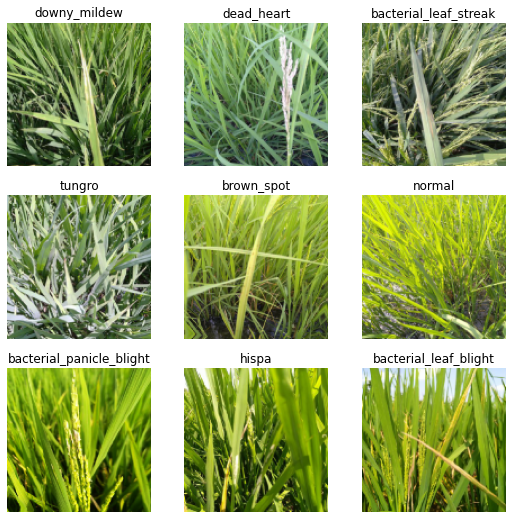

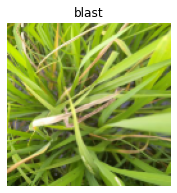

In [5]:
previewData()

### 3.4. Persebaran jumlah gambar latih untuk setiap kategori

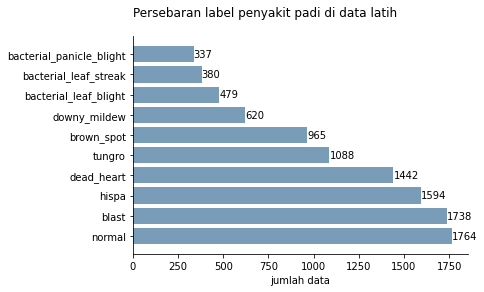

In [6]:
# Membuat grafik sebaran jumlah data latih setiap kategori
labels = tabular_data['label'].value_counts().index
values = tabular_data['label'].value_counts()

fig, ax = plt.subplots()
bars = ax.barh(labels, values, color="#799cb9")

ax.bar_label(bars)
plt.xlabel("jumlah data")
plt.title("Persebaran label penyakit padi di data latih", loc='left', pad=20)

sn.despine(top=True, right=True, left=False, bottom=False)
plt.show()

<a id="pemrosesan"></a> 
# 4. Pemrosesan data
Kode sumber pada bagian ini bertujuan untuk memproses data sebelum dilakukan proses pelatihan, tahapan pada pemrosesan data meliputi:
1. Pemisahan 20% data latih menjadi data validasi
2. Pendefinisian custom dataset
3. Transformasi gambar dengan augmentasi data
4. Persiapan data dengan DataLoader

### 4.1. Pemisahan 20% data latih menjadi data validasi
20% data latih akan menjadi data validasi guna memvalidasi kinerja model selama pelatihan, agar mudah menyesuaikan hyperparameter model dan konfigurasi yang optimal. Metode yang digunakan adalah stratified split agar proporsi kategori di data validasi akan sama seperti proporsi di data latih.

In [7]:
def get_train_val(train_path):
    labels = os.listdir(train_path)
    train_data = []
    val_data = []
    for label in labels:
        images_path = glob.glob(f'{train_path}/{label}/*.jpg')
        train_paths, val_paths = train_test_split(images_path, test_size=0.2, random_state=42)
        val_data += val_paths
        train_data += train_paths
    return train_data, val_data

### 4.2. Pendefinisian custom dataset
Menurut dokumentasi resmi dari [PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html), custom dataset menjadi syarat agar data dapat diolah pustaka PyTorch dan akan digunakan sebagai parameter untuk DataLoader, yang memparalelkan proses loading data dengan otomatis.

In [8]:
class CustomDatasetTimOrbit(Dataset):
    def __init__(self, data, dataset_name='', transforms=None):
        self.image_paths = data
        self.transforms = transforms
        self.name = dataset_name
        self.labelstoid = {path.split("/")[-2]: 0 for path in self.image_paths}
        for i, j in enumerate(self.labelstoid.keys()):
            self.labelstoid[j] = i
        self.idtolabels = dict((v, k) for k, v in self.labelstoid.items())
        self.num_classes = len(self.labelstoid)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path)[:, :, ::-1]  # convert it to rgb
        img = img.astype('float32')
        if self.transforms is not None:
            img = self.transforms(image=img)["image"]
        label = img_path.split("/")[-2]
        id = self.labelstoid[label]
        encoded_id = np.zeros(self.num_classes, dtype='float32')
        encoded_id[id] = 1
        return img, torch.tensor(encoded_id)

### 4.3 Transformasi gambar dengan augmentasi data
Tahap ini mengolah data gambar dengan memodifikasi data gambar dengan teknik rotasi, horizontal flip, center crop, dan color jitter pada image. Augmentasi data dilakukan dengan pustaka Albumentations yang bertujuan menambah keragaman data tanpa menambah data baru.

In [9]:
# Transformasi untuk data latih
train_transforms = A.Compose([
    A.OneOf([
        A.Rotate(30, p=1),
        A.HorizontalFlip(p=1),
        A.CenterCrop(height=480,width=480,p=1),
        A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1, p=1)
    ], p=0.8),
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

# Transformasi untuk data validasi
val_transforms = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

### 4.4. Persiapan data dengan DataLoader
DataLoader sendiri akan mendefinisikan dimana data gambar kita dan bagaimana parameternya. Data Loader akan menghandle sendiri batching serta parallel data loading. Output dari DataLoader akan langsung digunakan pada proses pelatihan model.

In [10]:
# Data dipisah menjadi 80% data latih dan 20% data validasi
train_data, val_data = get_train_val(train_path)

# Penerapan custom dataset dan augmentasi data
train_dataset = CustomDatasetTimOrbit(train_data, dataset_name='train', transforms=train_transforms)
val_dataset = CustomDatasetTimOrbit(val_data, dataset_name='validation', transforms=val_transforms)

num_classes = train_dataset.num_classes

# Penggunaan DataLoader untuk otomatisasi data loading
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=32, shuffle=True)

idtolabels = train_dataset.idtolabels

<a id="pendefinisian"></a> 
# 5. Pendefinisian algoritma/model
Kode sumber pada bagian ini bertujuan untuk mempersiapkan algoritma yang akan digunakan dalam melatih data, tahapan ini meliputi:
1. Inisialisasi model Resnet34
2. Inisialisasi optimizer
3. Inisialisasi learning rate dengan OneCycleLR
4. Inisialisasi loss function

### 5.1. Inisialisasi model Resnet34
Resnet merupakan pretrained model yang disediakan oleh PyTorch yang memiliki arsitektur convolutional neural network. Kode dibawah akan menyiapkan algoritma Resnet34

In [11]:
class CustomModel(nn.Module):
    def __init__(self, num_classes, model_name, pretrained=True):
        super(CustomModel, self).__init__()
        self.model = models.resnet34(pretrained=pretrained)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features=in_features, out_features=num_classes, bias=True)

    def forward(self, x):
        x = self.model(x)
        return x
    
model = CustomModel(num_classes, model_name='resnet34', pretrained=True)
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

### 5.2. Inisialisasi optimizer

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0)

### 5.3. Inisialisasi learning rate dengan OneCycleLR

In [13]:
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_dl), epochs=10)

### 5.4. Inisialisasi loss function

In [14]:
def criterion(inputs, targets):
    loss = F.cross_entropy(inputs, targets)
    return loss

<a id="pelatihan"></a> 
# 6. Proses pelatihan model
Kode sumber pada bagian ini bertujuan untuk melatih seluruh data dari model yang sudah didefinisikan di bagian sebelumnya, tahapan ini meliputi:
1. Inisialisasi WandB
2. Pendefinisian fungsi untuk menyimpan metrik loss data latih
3. Pendefinisian fungsi untuk menyimpan metrik loss data validasi
4. Proses pelatihan model

### 6.1 Inisialisasi WandB

In [15]:
base64_bytes = " MWU2ZWFmZjQwMGVkZmM3MjhjOTI0YTg1NjhhMDA1YTljMTBkZDNhZQ==".encode("ascii")
decoded_key_bytes = base64.b64decode(base64_bytes)

wandb.login(key=decoded_key_bytes.decode("ascii"))

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### 6.2. Pendefinisian fungsi untuk menyimpan metrik loss data latih dan validasi

In [16]:
log = {}

def train_epoch(model, dataloader, optimizer, scheduler, epoch):
    model.train()
    running_loss = 0.0
    dataset_size = 0
    log["lr"] = optimizer.param_groups[0]['lr']
    # tqdm untuk melihat progress
    with tqdm(dataloader, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch} train")
        # Setiap data diiterasi dan dikalkulsi metriksnya
        for inputs, targets in tepoch:
            inputs = inputs.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
            targets = targets.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()
            
            # kalkulasi epoch loss
            dataset_size += inputs.size(0)
            running_loss += loss.item() * inputs.size(0)
            epoch_loss = running_loss / dataset_size
            
            # kalkulasi learning rate
            current_lr = optimizer.param_groups[0]['lr']
            
            tepoch.set_postfix(loss=epoch_loss, lr=current_lr)
    log["train_loss"] = epoch_loss
    return epoch_loss

In [17]:
def val_epoch(model, dataloader, scheduler, epoch):
    model.eval()
    running_loss = 0.0
    dataset_size = 0
    running_corrects = 0
    total_targets_label = []
    total_outputs_label = []
    # tqdm untuk melihat progress
    with tqdm(dataloader, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch} val")
        # Setiap data diiterasi dan diprediksi kategorinya
        for inputs, targets in tepoch:
            inputs = inputs.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
            targets = targets.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # kalkulasi epoch loss
            dataset_size += inputs.size(0)
            running_loss += loss.item() * inputs.size(0)
            epoch_loss = running_loss / dataset_size
            
            # mendapatkan kategori hasil prediksi
            targets_label = torch.max(targets, dim=1)[1]
            outputs_label = torch.max(outputs, dim=1)[1]
            total_outputs_label += outputs_label.tolist()
            total_targets_label += targets_label.tolist()
            
            # menghitung akurasi per epoch
            running_corrects += torch.sum(outputs_label == targets_label).item()
            epoch_acc = running_corrects / dataset_size

            tepoch.set_postfix(loss=epoch_loss, acc=epoch_acc)
    log['conf_matrix'] = wandb.Image(create_confusion_matrix(total_outputs_label, total_targets_label))
    log["val_loss"] = epoch_loss
    log['acc'] = epoch_acc
    return epoch_loss, total_outputs_label, total_targets_label

### 6.3. Pendefinisian confusion matrix dan konfigurasi model

In [18]:
def create_confusion_matrix(preds, labels):
    cf_matrix = confusion_matrix(labels, preds)
    df_cm = pd.DataFrame(cf_matrix)
    plt.figure(figsize=(12, 7))
    s = sn.heatmap(df_cm, annot=True, fmt='g')
    s.set(xlabel='Label prediksi', ylabel='Label asli', title='Confusion matrix hasil pelatihan')
    s.set_xticklabels(list(idtolabels.values()), rotation=45)
    s.set_yticklabels(list(idtolabels.values()), rotation=0)
    plt.close('all')
    return s.get_figure()

In [19]:
CFG = {
    "batch_size": 32, "num_epochs": 10, 'pretrained': True, 'init_lr': 0.001,
    'weight_decay': 0, 'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'model_name': 'resnet34', 'min_lr': 0.001, 'max_lr': 0.01, 'patience': 0, 'gamma': 0.1, 
    'momentum': 0.9, 'optimizer': 'SGD', 'lr_scheduler': 'OneCycleLR', 'loss': 'CrossEntropy',
}

### 6.4. Proses pelatihan model

Model dijalankan dengan 10 epoch, selama pelatihan dijalankan, model dengan tingkat loss terbaik akan diekspor ke folder root dengan ekstensi .pt

In [20]:
project_name = "orbit-cv-tsdn-2022"
run = wandb.init(project=project_name, config=CFG, entity="smkn4_bdg")

since = time.time()
best_loss = 100000
for epoch in range(CFG['num_epochs']):
    train_epoch(model, train_dl, optimizer, scheduler, epoch)
    val_loss, output_preds, output_labels = val_epoch(model, val_dl, scheduler, epoch)
    # model ML terbaik akan disimpan dalam format .pt
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), "./ORBIT-best-model-CV.pt")
    # log pelatihan disimpan di wandb
    wandb.log(log)
time_elapsed = time.time() - since
print('Pelatihan model telah selesai dalam {:.0f}menit {:.0f}detik'.format(time_elapsed // 60, time_elapsed % 60))

run.finish()
display(ipd.IFrame(run.url, width=1000, height=720))

wandb: Currently logged in as: raff_imanda (smkn4_bdg). Use `wandb login --relogin` to force relogin


Epoch 9 val: 100%|██████████| 66/66 [00:35<00:00,  1.84batch/s, acc=0.974, loss=0.0892]


Pelatihan model telah selesai dalam 45menit 22detik


acc,▄▁▄▆▇▇████
lr,▁▃▆██▇▅▄▂▁
train_loss,█▅▄▃▂▂▂▁▁▁
val_loss,▅█▅▃▂▂▁▁▁▁
acc,0.97409
lr,0.00049
train_loss,0.47585
val_loss,0.08916


### 6.5. Metrik performansi hasil pelatihan

Pada tabel run summary diatas, kami mendapatkan akurasi model dengan skor 97,4% terhadap data validasi. Selanjutnya kami akan melihat seperti apa performa model keseluruhan terhadap masing-masing kategori penyakit yang ada

In [21]:
print(classification_report(output_preds, output_labels, target_names=list(idtolabels.values())))

                          precision    recall  f1-score   support

                  tungro       0.99      0.95      0.97       228
                   hispa       0.97      0.99      0.98       313
            downy_mildew       0.94      0.97      0.95       120
   bacterial_leaf_streak       1.00      0.95      0.97        80
   bacterial_leaf_blight       0.93      0.97      0.95        92
              brown_spot       0.96      0.98      0.97       189
                   blast       0.98      0.97      0.97       350
                  normal       0.98      0.98      0.98       353
              dead_heart       0.99      0.99      0.99       290
bacterial_panicle_blight       0.96      0.94      0.95        69

                accuracy                           0.97      2084
               macro avg       0.97      0.97      0.97      2084
            weighted avg       0.97      0.97      0.97      2084



Model yang dibuat memiliki performa terbaik dalam memprediksi kategori dead_heart namun sedikit ada kekeliruan dalam memprediksi kategori bacterial_panicle_blight. Hal ini terjadi karena persebaran proporsi data latih untuk kategori bacterial_panicle_blight terhitung paling sedikit dibanding kategori yang lain.

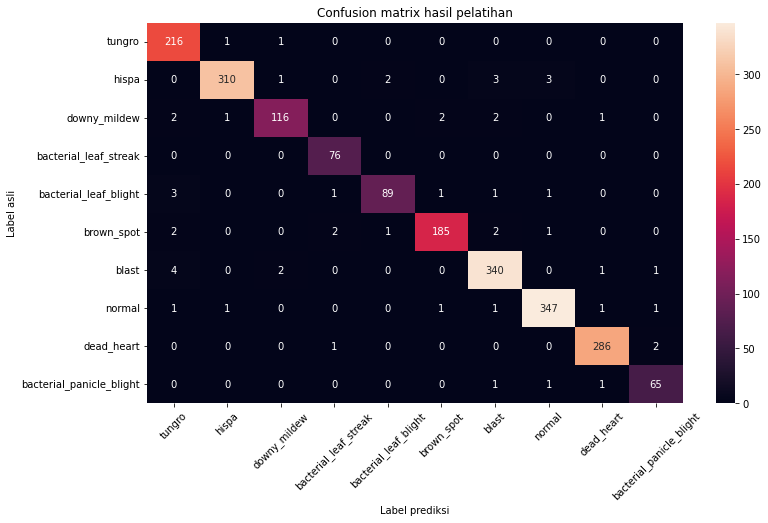

In [22]:
create_confusion_matrix(output_preds, output_labels)

Ini merupakan uraian grafik confusion matrix dari model yang sudah dibuat. Terlihat, model yang dibuat sudah dapat dikatakan mampu dalam memprediksi penyakit padi secara akurat, dan hanya membuat sedikit kesalahan prediksi yang terjadi.

<a id="performa"></a> 
# 7. Pengujian model machine learning
Kode sumber pada bagian ini bertujuan untuk , tahapan ini meliputi:
1. Pendefinisian urutan label
2. Pemuatan model
3. Pendefinisian fungsi melihat hasil prediksi
4. Pengujian pada 6 sample data uji
5. Pengujian pada data uji yang diinginkan
6. Pengujian interaktif melalui URL

### 7.1. Pendefinisian urutan label

In [23]:
labels = {
    'Bacterial Leaf Blight Disease': 0, 'Bacterial Leaf Streak Disease': 1,
    'Bacterial Panicle Blight Disease': 2, 'Blast Disease': 3, 'Brown Spot Disease': 4,
    'Dead Heart Disease': 5, 'Downy Mildew Disease': 6, 'Hispa Disease': 7,
    'Normal Disease': 8, 'Tungro Disease': 9 
    }

num_classes = len(labels.keys())
reverse_labels = dict((v, k) for k, v in labels.items())

### 7.2. Pemuatan model

Model machine learning hasil pelatihan dengan akurasi terbaik kembali dimuat ulang dan disiapkan untuk melakukan pengujian terhadap data gambar padi. Kedepannya, file ini pula yang akan diimplementasikan kedalam Web Apps agar hasil capaian computer vision ini dapat diakses lebih fleksibel dengan device apapun melalui web browser.

In [24]:
model_path = "./ORBIT-best-model-CV.pt"
model = CustomModel(num_classes=num_classes, model_name='resnet34', pretrained=True)
model.load_state_dict(torch.load(model_path))
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model.eval()
print("")

### 7.3. Pendefinisian fungsi melihat hasil prediksi

Fungsi dibawah akan mengembalikan data gambar yang diprediksi, lengkap dengan hasil prediksi disertai skor tensor (confidence skor).

In [25]:
def show_image_label(image, label_pred, pred_prob, from_path=True):
    if from_path:
        images = '/kaggle/input/paddy-disease-classification/test_images/' + image
        plt.imshow(mpimg.imread(images))
        plt.show()
    else:
        plt.imshow(image)
        plt.show()
    
    print(f'Hasil prediksi: {label_pred}')
    print(f'Dengan value tensor: {round(pred_prob.detach().cpu().numpy()[0][pred] * 1, 4)}')
    print('Skor ini merupakan tensor tertinggi dari 10 kategori yang ada\n\n')

### 7.4. Pengujian pada data 6 sample data uji

Di bagian ini, kami menguji model dengan 6 sampel data uji yang berada di path /test_images

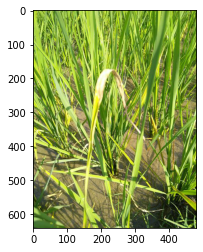

Hasil prediksi: downy_mildew
Dengan value tensor: 16.2643
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




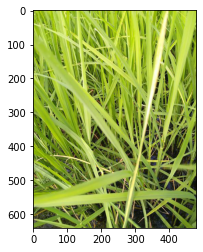

Hasil prediksi: bacterial_leaf_blight
Dengan value tensor: 14.9087
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




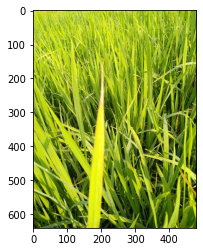

Hasil prediksi: bacterial_leaf_blight
Dengan value tensor: 12.477
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




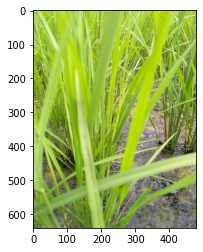

Hasil prediksi: normal
Dengan value tensor: 8.8608
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




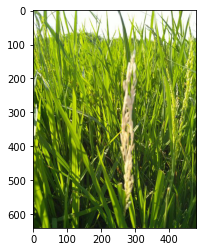

Hasil prediksi: dead_heart
Dengan value tensor: 18.1254
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




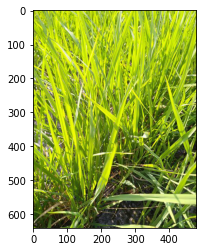

Hasil prediksi: blast
Dengan value tensor: 5.4784
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




In [26]:
# mengambil acak 6 sampel data uji untuk diprediksi
idtolabels = train_dataset.idtolabels
images_path = glob.glob('/kaggle/input/paddy-disease-classification/test_images/*.jpg')
selected_images = random.sample(images_path, 6)

for img_path in selected_images:
    # pemrosesan gambar
    img = cv2.imread(img_path)[:, :, ::-1]  # konversi ke rgb
    img = img.astype('float32')
    img = val_transforms(image=img)['image'] # augmentasi yang sama seperti data validasi
    img = img[None, ...].to(CFG['device'])
    
    # prediksi
    pred_prob = model(img) 
    pred = torch.max(pred_prob, dim=1)[1]
    label = idtolabels[pred.item()]
    
    # menampilkan hasil
    show_image_label(img_path.split("/")[-1], label, pred_prob)

### 7.5. Pengujian pada data uji yang diinginkan

Di bagian ini, gambar yang diprediksi merupakan gambar yang didefinisikan dengan path di data input (kaggle).

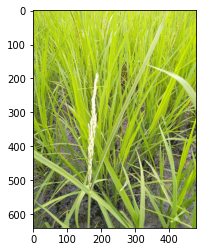

Hasil prediksi: dead_heart
Dengan value tensor: 17.603
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




In [27]:
# spesifikasikan gambar yang ingin diprediksi
image_path = '../input/paddy-disease-classification/test_images/200007.jpg'

# pemrosesan gambar
img = cv2.imread(image_path)[:, :, ::-1]  # konversi ke rgb
img = img.astype('float32')
img = val_transforms(image=img)['image'] # augmentasi yang sama seperti data validasi
img = img[None, ...].to(CFG['device'])

# prediksi
pred_prob = model(img) 
pred = torch.max(pred_prob, dim=1)[1]
label = idtolabels[pred.item()]

# menampilkan hasil
show_image_label(image_path.split("/")[-1], label, pred_prob)

### 7.4. Pengujian interaktif melalui URL

Dibawah ini merupakan pengujian terhadap gambar padi yang disimpan di suatu alamat web tertentu. Sebelum diolah, gambar akan diterima menggunakan pustaka urllib dan mengubahnya ke bentuk numpy array.

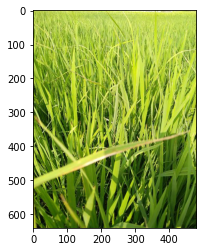

Hasil prediksi: bacterial_leaf_blight
Dengan value tensor: 12.5603
Skor ini merupakan tensor tertinggi dari 10 kategori yang ada




In [28]:
# ambil gambar dari url
req = urllib.request.urlopen('https://i.ibb.co/f9ww6cx/100049.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

# pemrosesan gambar
imag = cv2.imdecode(arr, -1)[:, :, ::-1] # decode dan konversi ke rgb
img = imag.astype('float32')
img = val_transforms(image=img)['image'] # apply same transforms of validation set
img = img[None, ...].to(CFG['device']) # add batch dimension to image and use device

# prediksi
pred_prob = model(img) 
pred = torch.max(pred_prob, dim=1)[1]
label = idtolabels[pred.item()]

# menampilkan hasil
show_image_label(imag, label, pred_prob, from_path=False)

<a id="deploy"></a> 
# 8. Tahap produksi (web deploy)
Notebook ini adalah hasil tindak lanjut dari temuan insight dari dashboard yang kami buat pada laman [https://public.tableau.com/app/profile/raka.iskandar/viz/VisualisasiDataTSDN2022/Dashboard1](https://public.tableau.com/app/profile/raka.iskandar/viz/VisualisasiDataTSDN2022/Dashboard1). <br> <br>
Kami telah membuat model machine learning yang mampu memprediksi penyakit padi dengan akurasi sekitar 97%. Selanjutnya kami mengimplementasikan model dalam notebook ini menjadi website yang memudahkan tim panelis maupun user dalam melakukan ujicoba model klasifikasi penyakit padi tanpa harus menjalankan keseluruhan kode yang ada di notebook ini. 
<br> <br>
Panelis dapat mengunjungi tautan berikut [https://orbit-padi-kita.herokuapp.com/](https://orbit-padi-kita.herokuapp.com/). 
<br>

Dibawah ini merupakan deskripsi singkat dari website kami:
    
#### 8.1. Tujuan
Mengimplementasikan model machine learning yang dibuat kedalam bentuk website agar dapat diakses oleh device apapun melalui web browser secara cepat dan akurat.

#### 8.2. Alamat web
[https://orbit-padi-kita.herokuapp.com/](https://orbit-padi-kita.herokuapp.com/)

#### 8.3. Web Technology Stack
* UI/UX Design
<p align="left"> 
    <a href="" target="_blank" rel="noreferrer"> <img src="https://seeklogo.com/images/C/coreldraw-x7-logo-747B0DC253-seeklogo.com.png" alt="corel" width="40" height="40"/> </a> 
</p>

* Front-end
<p align="left"> 
    <a href="https://www.w3.org/html/" target="_blank" rel="noreferrer"> <img src="https://raw.githubusercontent.com/devicons/devicon/master/icons/html5/html5-original-wordmark.svg" alt="html5" width="40" height="40"/> </a> 
    <a href="https://www.w3schools.com/css/" target="_blank" rel="noreferrer"> <img src="https://raw.githubusercontent.com/devicons/devicon/master/icons/css3/css3-original-wordmark.svg" alt="css3" width="40" height="40"/> </a> 
    <a href="https://developer.mozilla.org/en-US/docs/Web/JavaScript" target="_blank" rel="noreferrer"> <img src="https://raw.githubusercontent.com/devicons/devicon/master/icons/javascript/javascript-original.svg" alt="javascript" width="40" height="40"/> </a> 
    <a href="https://getbootstrap.com" target="_blank" rel="noreferrer"> <img src="https://raw.githubusercontent.com/devicons/devicon/master/icons/bootstrap/bootstrap-plain-wordmark.svg" alt="bootstrap" width="40" height="40"/> </a> 
</p>

* Back-end
<p align="left"> 
    <a href="https://flask.palletsprojects.com/" target="_blank" rel="noreferrer"> <img src="https://www.vectorlogo.zone/logos/pocoo_flask/pocoo_flask-icon.svg" alt="flask" width="40" height="40"/> </a> 
    <a href="https://www.python.org" target="_blank" rel="noreferrer"> <img src="https://raw.githubusercontent.com/devicons/devicon/master/icons/python/python-original.svg" alt="python" width="40" height="40"/> </a> 
</p>

* Hosting
<p align="left"> 
    <a href="https://heroku.com" target="_blank" rel="noreferrer"> <img src="https://www.vectorlogo.zone/logos/heroku/heroku-icon.svg" alt="heroku" width="40" height="40"/> </a> 
</p>

<a id="pustaka"></a> 
# 9. Daftar pustaka
Sumber data:
> Department of Computer Science and Engineering, Manonmaniam Sundaranar University, Tirunelveli, India. (2022). *Paddy Doctor: Paddy Disease Classification*. Diakses pada 12 November 2022, dari [https://www.kaggle.com/competitions/paddy-disease-classification/data](https://www.kaggle.com/competitions/paddy-disease-classification/data).

Dokumentasi pustaka:
> Scikit-Learn. *Train Test Split*. Diakses pada 13 November 2022, dari [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

> PyTorch. *Dataset & DataLoaders*, *Build Model*, *Optimizing Model Parameters*, *Save and Load the Model*. Diakses pada 14 November 2022, dari [https://pytorch.org/tutorials/beginner/basics/](https://pytorch.org/tutorials/beginner/basics/).

> Albumentations. *Image Augmentation*. Diakses pada 14 November 2022, dari [https://albumentations.ai/docs/getting_started/image_augmentation/](https://albumentations.ai/docs/getting_started/image_augmentation/).

> Weights & Biases (WandB). *Quickstart with WandB*. Diakses pada 15 November 2022, dari [https://docs.wandb.ai/quickstart](https://docs.wandb.ai/quickstart).

> PyTorch. *Torch.optim*. Diakses pada 15 November 2022, dari [https://pytorch.org/docs/stable/optim.html](https://pytorch.org/docs/stable/optim.html).

Referensi:
> Mortensen, Peter. (2018). *How can I read an image from an Internet URL in Python cv2, scikit image and mahotas?*. Diakses pada 17 November 2022, dari [https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah](https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah).

> R, Yash. (2020). *Seaborn Heatmap – A comprehensive guide*. Diakses pada 15 November 2022, dari [https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/).

> Dicoding Academy. (2020) *Belajar Machine Learning untuk Pemula*. Diakses pada 17 November 2022, dari [https://www.dicoding.com/academies/184/tutorials/8527](https://www.dicoding.com/academies/184/tutorials/8527).

> Tdy. (2021). *how to display the value of the bar on each bar with pyplot barh*. Diakses pada 13 November 2022, dari [https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh](https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh).

> Ihritik. (2021). *Python | shutil.copy() method*. Diakses pada 12 November 2022, dari [https://www.geeksforgeeks.org/python-shutil-copy-method/](https://www.geeksforgeeks.org/python-shutil-copy-method/).

> Howard, Jeremy. (2022). *Small models road to the top part 2*. Diakses pada 13 November 2022, dari [https://www.kaggle.com/code/jhoward/small-models-road-to-the-top-part-2](https://www.kaggle.com/code/jhoward/small-models-road-to-the-top-part-2).

> Miquel. (2022). Diakses pada 13 November 2022, dari [https://www.kaggle.com/miquel0](https://www.kaggle.com/miquel0).

> Mussari. (2022). *Stratified cross validation ResNet34 FastAi*. Diakses pada 13 November 2022, dari [https://www.kaggle.com/code/fmussari/stratified-cross-validation-resnet34-fastai](https://www.kaggle.com/code/fmussari/stratified-cross-validation-resnet34-fastai).

> Putra, Rafka Imanda (2022). *Klasifikasi Citra Gambar 'Kertas Gunting Batu' dengan Tensorflow Keras*. Diakses pada 17 November 2022, dari [https://github.com/rafka-imandaputra/Rafka-data-science-project-compilation/blob/main/Image%20classification/notebook.ipynb](https://github.com/rafka-imandaputra/Rafka-data-science-project-compilation/blob/main/Image%20classification/notebook.ipynb).

> Iskandar, Raka. (2022). *Visualisasi Data TSDN 2022 Tim Orbit*. Diakses pada 17 November 2022, dari [https://public.tableau.com/app/profile/raka.iskandar/viz/VisualisasiDataTSDN2022/Dashboard1](https://public.tableau.com/app/profile/raka.iskandar/viz/VisualisasiDataTSDN2022/Dashboard1)

> Az-Zahra, Raihana Aisha. (2022). *Static file website Tim Orbit*. Diakses pada 17 November 2022, dari [https://github.com/raihanaiooo/competitions/tree/main/Web](https://github.com/raihanaiooo/competitions/tree/main/Web)